# Market Sizing & Growth Analysis Dashboard

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import os
import re

In [11]:
apr_df = pd.read_excel('amapr2025repo.xls', sheet_name='Apr 25', skiprows=2)
may_df = pd.read_excel('ammay2025repo.xls', sheet_name='May 25', skiprows=2)
jun_df = pd.read_excel('amjun2025repo.xls', sheet_name='Jun 25', skiprows=2)
print(apr_df.head())
print(apr_df.columns)



   Sr                   Scheme Name  No. of Schemes as on April 30, 2025  \
0    A            Open ended Schemes                                 NaN   
1    I  Income/Debt Oriented Schemes                                 NaN   
2    i                Overnight Fund                                  35   
3   ii                   Liquid Fund                                  37   
4  iii     Ultra Short Duration Fund                                  25   

   No. of Folios as on April 30, 2025  \
0                                 NaN   
1                                 NaN   
2                            651034.0   
3                           1912584.0   
4                            672543.0   

   Funds Mobilized for the month of April 2025 (INR in crore)  \
0                                                NaN            
1                                                NaN            
2                                      452346.878285            
3                                   

In [26]:
# Extract April data columns and rename month column
apr_aum = apr_df[['Scheme Name ', 'Net Assets Under Management as on April 30, 2025 (INR in crore)']].copy()
apr_aum.columns = ['Scheme Name', 'AUM_INR_Crore']  # Standardize column names
apr_aum['Month'] = pd.to_datetime('2025-04-30')   # Add month column

# Extracting May data columns and rename month column
may_aum = may_df[['Scheme Name ', 'Net Assets Under Management as on May 31, 2025 (INR in crore)']].copy()
may_aum.columns = ['Scheme Name', 'AUM_INR_Crore']
may_aum['Month'] = pd.to_datetime('2025-05-31')

# Extracting June data columns and rename month column
jun_aum = jun_df[['Scheme Name ', 'Net Assets Under Management as on June 30, 2025 (INR in crore)']].copy()
jun_aum.columns = ['Scheme Name', 'AUM_INR_Crore']
jun_aum['Month'] = pd.to_datetime('2025-06-30')

# Concatenate all months vertically
aum_long_df = pd.concat([apr_aum, may_aum, jun_aum], ignore_index=True)

# Preview combined long-format data
print(aum_long_df.head())
print(aum_long_df.tail())


                    Scheme Name  AUM_INR_Crore      Month
0            Open ended Schemes            NaN 2025-04-30
1  Income/Debt Oriented Schemes            NaN 2025-04-30
2                Overnight Fund   86833.815596 2025-04-30
3                   Liquid Fund  559824.183654 2025-04-30
4     Ultra Short Duration Fund  126436.704459 2025-04-30
                                           Scheme Name  AUM_INR_Crore  \
262                                                NaN            NaN   
263                 Fund of Funds Scheme (Domestic) **  118077.413668   
264                                                NaN            NaN   
265  ** Data in respect Fund of Funds Domestic is s...            NaN   
266  ## Include NFOs - Nippon India Income Plus Arb...            NaN   

         Month  
262 2025-06-30  
263 2025-06-30  
264 2025-06-30  
265 2025-06-30  
266 2025-06-30  


In [27]:
# Aggregate total AUM across all schemes by month
total_aum_by_month = aum_long_df.groupby('Month')['AUM_INR_Crore'].sum().reset_index()

# Preview the aggregated data
print(total_aum_by_month)


       Month  AUM_INR_Crore
0 2025-04-30   2.809962e+07
1 2025-05-31   2.898654e+07
2 2025-06-30   2.988072e+07


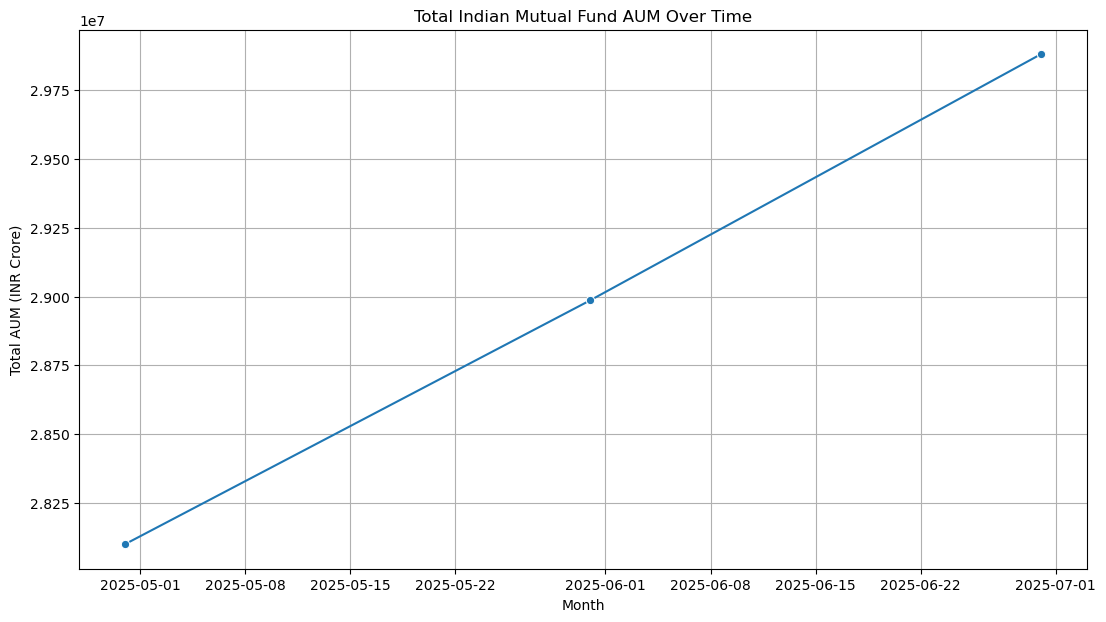

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,7))
sns.lineplot(data=total_aum_by_month, x='Month', y='AUM_INR_Crore', marker='o')
plt.title('Total Indian Mutual Fund AUM Over Time')
plt.xlabel('Month')
plt.ylabel('Total AUM (INR Crore)')
plt.grid(True)
plt.show()

In [31]:
total_aum_by_month['AUM_lag'] = total_aum_by_month['AUM_INR_Crore'].shift(1)
total_aum_by_month['MoM_Growth_%'] = ((total_aum_by_month['AUM_INR_Crore'] - total_aum_by_month['AUM_lag']) / total_aum_by_month['AUM_lag']) * 100

print(total_aum_by_month)


       Month  AUM_INR_Crore       AUM_lag  MoM_Growth_%
0 2025-04-30   2.809962e+07           NaN           NaN
1 2025-05-31   2.898654e+07  2.809962e+07      3.156324
2 2025-06-30   2.988072e+07  2.898654e+07      3.084815


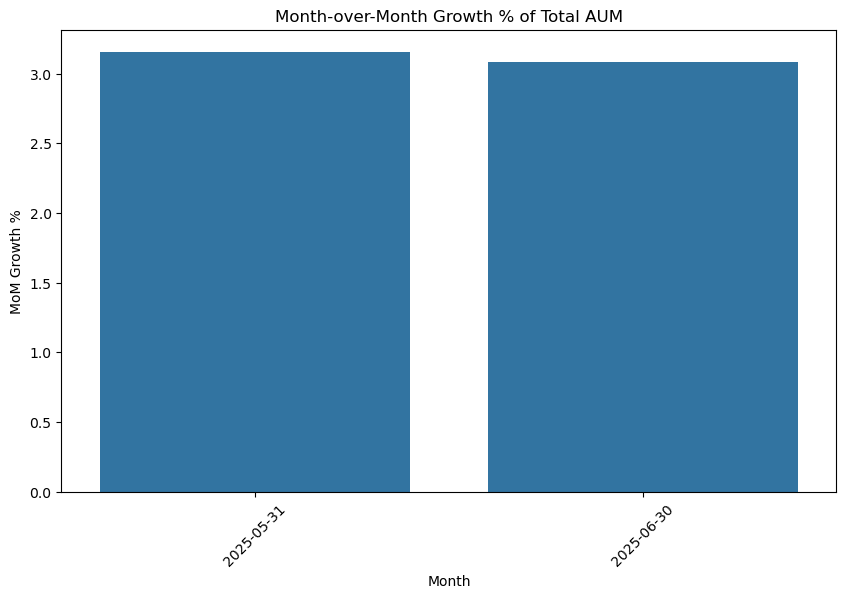

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=total_aum_by_month[1:], x='Month', y='MoM_Growth_%')  # exclude first month (NaN growth)
plt.title('Month-over-Month Growth % of Total AUM')
plt.xlabel('Month')
plt.ylabel('MoM Growth %')
plt.xticks(rotation=45)
plt.show()


In [33]:
latest_month = aum_long_df['Month'].max()
top_schemes = aum_long_df[aum_long_df['Month'] == latest_month].sort_values(by='AUM_INR_Crore', ascending=False).head(10)

print(top_schemes[['Scheme Name', 'AUM_INR_Crore']])


                                           Scheme Name  AUM_INR_Crore
261                                        Grand Total   7.440671e+06
233                         Total A-Open ended Schemes   7.414846e+06
210  Sub Total - II (i+ii+iii+iv+v+vi+vii+viii+ix+x...   3.346849e+06
196  Sub Total - I (i+ii+iii+iv+v+vi+vii+viii+ix+x+...   1.758110e+06
231                        Sub Total - V (i+ii+iii+iv)   1.261730e+06
219                 Sub Total - III (i+ii+iii+iv+v+vi)   9.920086e+05
229                                         Other ETFs   8.592606e+05
207                            Sectoral/Thematic Funds   5.093448e+05
181                                        Liquid Fund   4.998568e+05
209                                     Flexi Cap Fund   4.942788e+05


C:\Users\Piyush\AppData\Local\Temp\ipykernel_42912\1997561557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_schemes, y='Scheme Name', x='AUM_INR_Crore', palette='viridis')


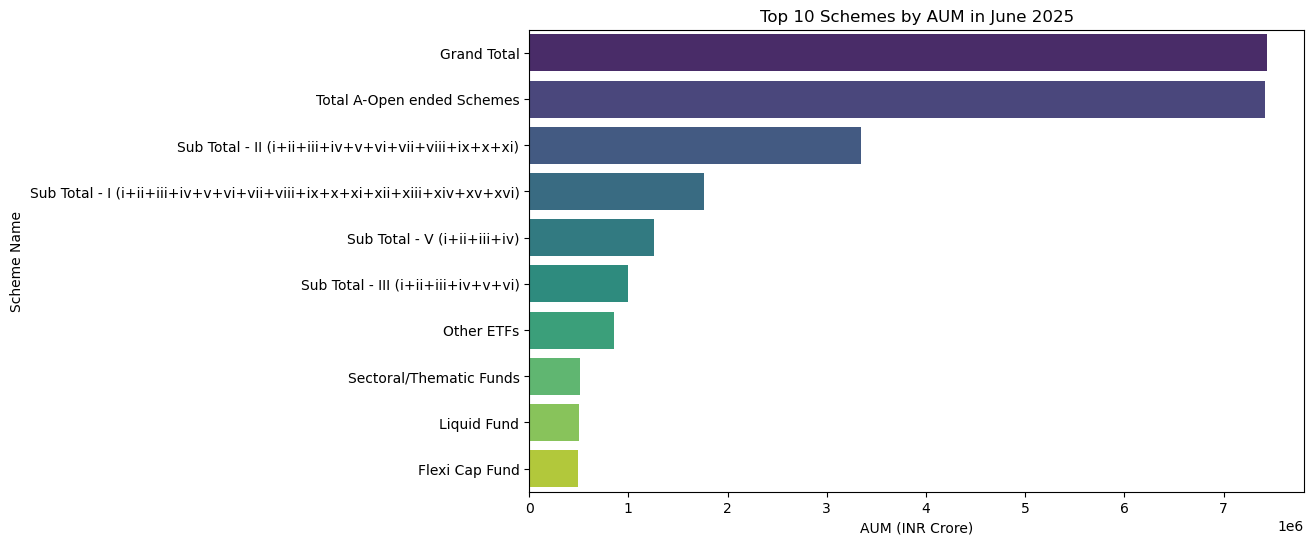

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_schemes, y='Scheme Name', x='AUM_INR_Crore', palette='viridis')
plt.title(f'Top 10 Schemes by AUM in {latest_month.strftime("%B %Y")}')
plt.xlabel('AUM (INR Crore)')
plt.ylabel('Scheme Name')
plt.show()
